<a href="https://colab.research.google.com/github/CarolinySilva/Crud_Topicos/blob/master/tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import nltk
import string

import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import plotly.express as px

from sklearn.preprocessing import StandardScaler

import plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import plot, iplot

import cufflinks as cf
cf.go_offline()
plotly.offline.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
dados = pd.read_csv("dataset.csv")
dados.head()

,Carimbo de data/hora,Qual sua faixa etária?,Qual a sua escolaridade?,"Tendo em vista que uma Microempresa (ME) pode faturar até R$ 360 mil por ano e uma Empresa de Pequeno Porte (EPP) entre R$ 360 mil e R$ 3,6 milhões. Qual o porte da sua empresa?",Qual setor econômico da sua empresa?,Quanto tempo sua empresa está no mercado?,"Você e os funcionários da sua empresa, caso você tenha, tem acesso a Internet?",Qual nível digital sua empresa se encontra ?,Selecione quais boas práticas de engajamento você utiliza para se conectar online com seus clientes.,Sua empresa entrou no processo de inclusão digital devido ao isolamento social da Covid-19?,Você sente ou sentiu dificuldade de incluir sua empresa no digital?,Quais os principais desafios que sua empresa sofreu ou sofre para iniciar a inclusão/maturidade digital?,"Caso você tenha, deixe aqui alguma consideração sobre a temática que você gostaria de acrescentar na pesquisa."
0,08/06/2022 13:41:54,Entre 45 e 60 anos,Ensino médio completo,Microempresa(ME),Comércio,1 a 2 anos,3,Nível 2: Empresas emergentes(engloba a organiz...,Mídias Sociais,Aderi ao digital durante a pandemia,1,"Falta de capital financeiro, Escassez de funci...",NaN
1,08/06/2022 13:55:49,Entre 30 e 45 anos,Superior incompleto,Microempresa(ME),Serviços,2 a 5 anos,5,Nível 3: Intermediário(é aquela que está traba...,Mídias Sociais,Aderi ao digital antes da pandemia,5,Falta de capital financeiro,NaN
2,08/06/2022 13:56:09,Entre 18 e 30 anos,Ensino médio completo,Microempresa(ME),Comércio,Mais de 10 anos,5,Nível 3: Intermediário(é aquela que está traba...,Mídias Sociais,Aderi ao digital antes da pandemia,5,Analfabetismo digital ou funcional,NaN
3,08/06/2022 13:56:12,Entre 18 e 30 anos,Ensino médio completo,Microempresa(ME),Agropecuária,2 a 5 anos,5,Nível 4: Líder digital( lidera seu setor tanto...,Mídias Sociais,Ainda não entramos no processo,5,"Falta de capital financeiro, Ainda não inclui ...",NaN
4,08/06/2022 13:58:08,Entre 18 e 30 anos,Superior incompleto,Empresa de Pequeno Porte(EPP),Comércio,1 a 2 anos,5,Nível 4: Líder digital( lidera seu setor tanto...,Mídias Sociais,Aderi ao digital antes da pandemia,5,Analfabetismo digital ou funcional,NaN


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dados.shape

(62, 13)

In [6]:
dados['idade_categoria'] = dados['Qual sua faixa etária?'].map(lambda idade: 1 if idade == "Entre 18 e 30 anos" else 2 if idade == "Entre 30 e 45 anos"  else 3 if idade == "Entre 45 e 60 anos" else 4).astype(int)

dados['escolaridade_categoria'] = dados['Qual a sua escolaridade?'].map(lambda escolaridade: 1 if escolaridade == "Fundamental incompleto" else 2 if escolaridade == "Fundamental completo"  else 3 if escolaridade == "Ensino médio incompleto" else 4 if escolaridade == "Ensino médio completo" else 5 if escolaridade == "Superior incompleto" else 6 if escolaridade == "Superior completo" else 7 if escolaridade == "Mestrado" else 8).astype(int)

dados['setor_categoria'] = dados['Qual setor econômico da sua empresa?'].map(lambda setor: 1 if setor == "Indústria" else 2 if setor == "Serviços"  else 3 if setor == "Construção" else 4 if setor == "Agropecuária"  else 5).astype(int)

dados['nivel_maturidade_categoria'] = dados['Qual nível digital sua empresa se encontra ?'].map(lambda nivel: 1 if nivel == "Nível 1: Empresas analógicas(é aquela mais avessa à tecnologia, que ainda resiste à mudança e adota poucos ou nenhum processo digitalizado)" else 2 if nivel == "Nível 2: Empresas emergentes(engloba a organização que já começa a experimentar as tecnologias digitais)."  else 3 if nivel == "Nível 3: Intermediário(é aquela que está trabalhando no meio digital, no entanto, não baseia totalmente seu negócio no digital)"  else 4).astype(int)

dados['adesao_covid'] = dados['Sua empresa entrou no processo de inclusão digital devido ao isolamento social da Covid-19?'].map(lambda covid: 1 if covid == "Aderi ao digital durante a pandemia" else 2 if covid == "Aderi ao digital antes da pandemia" else 3).astype(int)


In [7]:
dados

,Carimbo de data/hora,Qual sua faixa etária?,Qual a sua escolaridade?,"Tendo em vista que uma Microempresa (ME) pode faturar até R$ 360 mil por ano e uma Empresa de Pequeno Porte (EPP) entre R$ 360 mil e R$ 3,6 milhões. Qual o porte da sua empresa?",Qual setor econômico da sua empresa?,Quanto tempo sua empresa está no mercado?,"Você e os funcionários da sua empresa, caso você tenha, tem acesso a Internet?",Qual nível digital sua empresa se encontra ?,Selecione quais boas práticas de engajamento você utiliza para se conectar online com seus clientes.,Sua empresa entrou no processo de inclusão digital devido ao isolamento social da Covid-19?,Você sente ou sentiu dificuldade de incluir sua empresa no digital?,Quais os principais desafios que sua empresa sofreu ou sofre para iniciar a inclusão/maturidade digital?,"Caso você tenha, deixe aqui alguma consideração sobre a temática que você gostaria de acrescentar na pesquisa.",idade_categoria,escolaridade_categoria,setor_categoria,nivel_maturidade_categoria,adesao_covid
0,08/06/2022 13:41:54,Entre 45 e 60 anos,Ensino médio completo,Microempresa(ME),Comércio,1 a 2 anos,3,Nível 2: Empresas emergentes(engloba a organiz...,Mídias Sociais,Aderi ao digital durante a pandemia,1,"Falta de capital financeiro, Escassez de funci...",NaN,3,4,5,2,1
1,08/06/2022 13:55:49,Entre 30 e 45 anos,Superior incompleto,Microempresa(ME),Serviços,2 a 5 anos,5,Nível 3: Intermediário(é aquela que está traba...,Mídias Sociais,Aderi ao digital antes da pandemia,5,Falta de capital financeiro,NaN,2,5,2,3,2
2,08/06/2022 13:56:09,Entre 18 e 30 anos,Ensino médio completo,Microempresa(ME),Comércio,Mais de 10 anos,5,Nível 3: Intermediário(é aquela que está traba...,Mídias Sociais,Aderi ao digital antes da pandemia,5,Analfabetismo digital ou funcional,NaN,1,4,5,3,2
3,08/06/2022 13:56:12,Entre 18 e 30 anos,Ensino médio completo,Microempresa(ME),Agropecuária,2 a 5 anos,5,Nível 4: Líder digital( lidera seu setor tanto...,Mídias Sociais,Ainda não entramos no processo,5,"Falta de capital financeiro, Ainda não inclui ...",NaN,1,4,4,4,3
4,08/06/2022 13:58:08,Entre 18 e 30 anos,Superior incompleto,Empresa de Pequeno Porte(EPP),Comércio,1 a 2 anos,5,Nível 4: Líder digital( lidera seu setor tanto...,Mídias Sociais,Aderi ao digital antes da pandemia,5,Analfabetismo digital ou funcional,NaN,1,5,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,01/07/2022 22:13:25,Entre 45 e 60 anos,Superior completo,Empresa de Pequeno Porte(EPP),Indústria,5 a 10 anos,5,Nível 3: Intermediário(é aquela que está traba...,"Website, Mídias Sociais",Aderi ao digital antes da pandemia,1,Insegurança/Desconfiança,NaN,3,6,1,3,2
58,01/07/2022 22:14:30,Entre 18 e 30 anos,Superior completo,Empresa de Pequeno Porte(EPP),Comércio,2 a 5 anos,5,Nível 3: Intermediário(é aquela que está traba...,"Website, Mídias Sociais",Aderi ao digital durante a pandemia,1,medo do desconhecido,NaN,1,6,5,3,1
59,01/07/2022 22:16:57,Entre 18 e 30 anos,Ensino médio incompleto,Microempresa(ME),Comércio,1 a 2 anos,5,Nível 2: Empresas emergentes(engloba a organiz...,Mídias Sociais,Aderi ao digital durante a pandemia,1,Falta de capital financeiro,NaN,1,3,5,2,1
60,01/07/2022 22:17:48,Entre 30 e 45 anos,Doutorado,Empresa de Pequeno Porte(EPP),Indústria,5 a 10 anos,5,Nível 3: Intermediário(é aquela que está traba...,"Website, Mídias Sociais",Aderi ao digital antes da pandemia,1,Escassez de funcionários com conhecimento e ha...,NaN,2,8,1,3,2


In [8]:
correlacao_dados = dados.corr()
correlacao_dados.style.background_gradient(cmap="coolwarm")

,"Você e os funcionários da sua empresa, caso você tenha, tem acesso a Internet?",Você sente ou sentiu dificuldade de incluir sua empresa no digital?,idade_categoria,escolaridade_categoria,setor_categoria,nivel_maturidade_categoria,adesao_covid
"Você e os funcionários da sua empresa, caso você tenha, tem acesso a Internet?",1.000000,0.496324,-0.641597,0.499024,0.183064,0.636591,-0.230169
Você sente ou sentiu dificuldade de incluir sua empresa no digital?,0.496324,1.000000,-0.508605,0.143927,0.281113,0.641741,0.202247
idade_categoria,-0.641597,-0.508605,1.000000,-0.327796,-0.251315,-0.634299,0.186094
escolaridade_categoria,0.499024,0.143927,-0.327796,1.000000,-0.075966,0.283608,-0.061575
setor_categoria,0.183064,0.281113,-0.251315,-0.075966,1.000000,0.099164,0.132631
nivel_maturidade_categoria,0.636591,0.641741,-0.634299,0.283608,0.099164,1.000000,-0.139510
adesao_covid,-0.230169,0.202247,0.186094,-0.061575,0.132631,-0.139510,1.000000


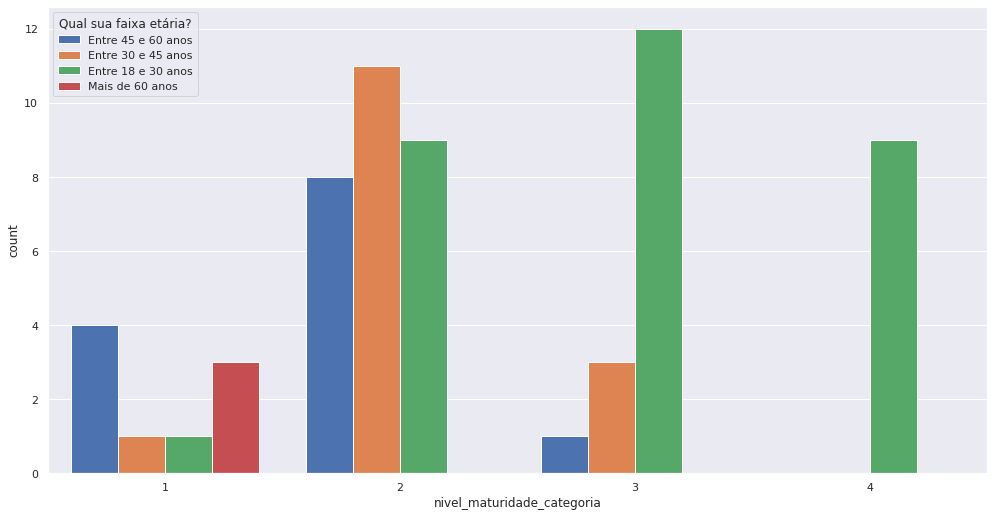

In [10]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data = dados , x='nivel_maturidade_categoria',  hue='Qual sua faixa etária?', saturation=10)


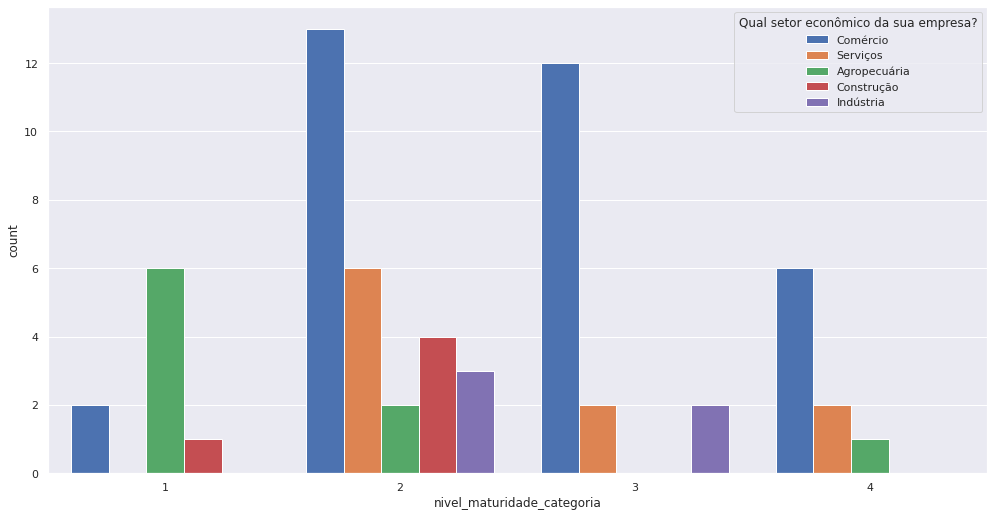

In [11]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.countplot(data = dados , x='nivel_maturidade_categoria',  hue='Qual setor econômico da sua empresa?', saturation=1)


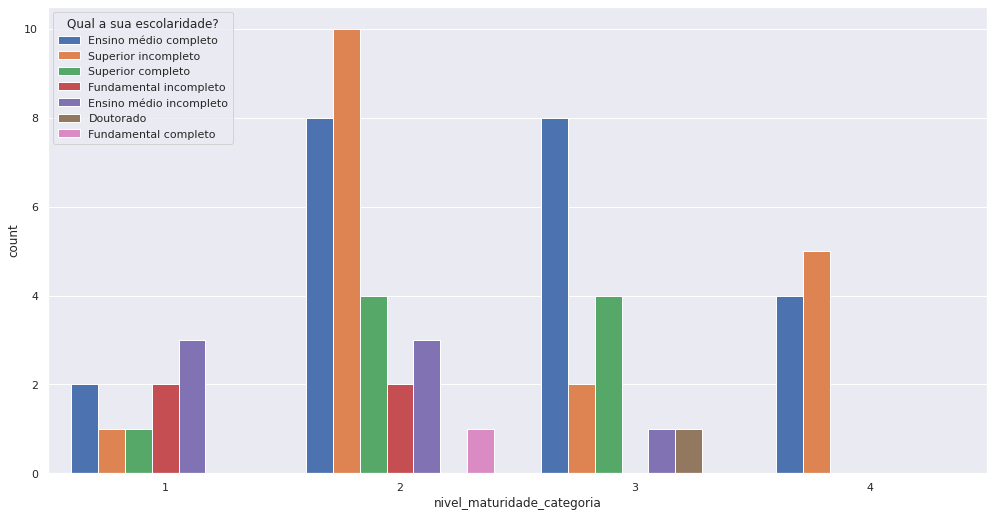

In [12]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.countplot(data = dados , x='nivel_maturidade_categoria',  hue='Qual a sua escolaridade?', saturation=1)

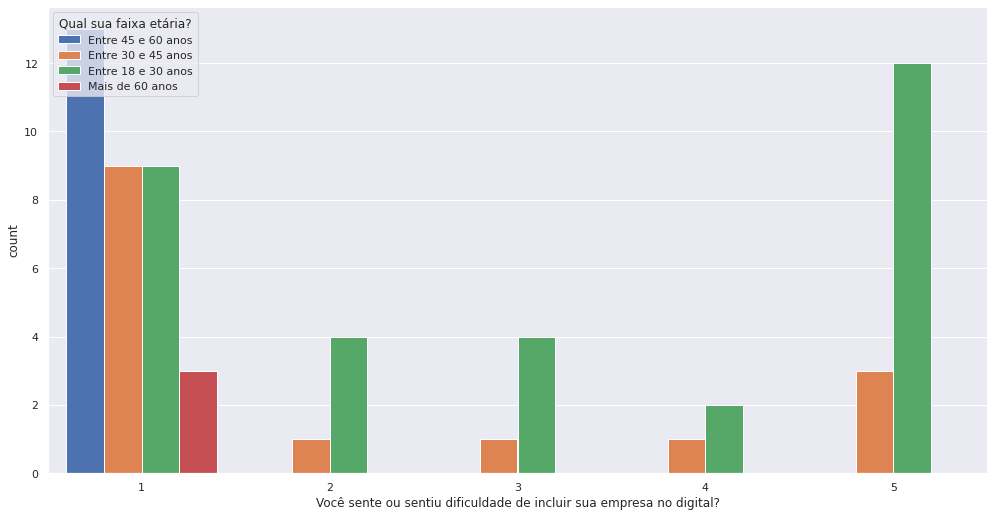

In [13]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.countplot(data = dados , x='Você sente ou sentiu dificuldade de incluir sua empresa no digital?',  hue='Qual sua faixa etária?', saturation=1)

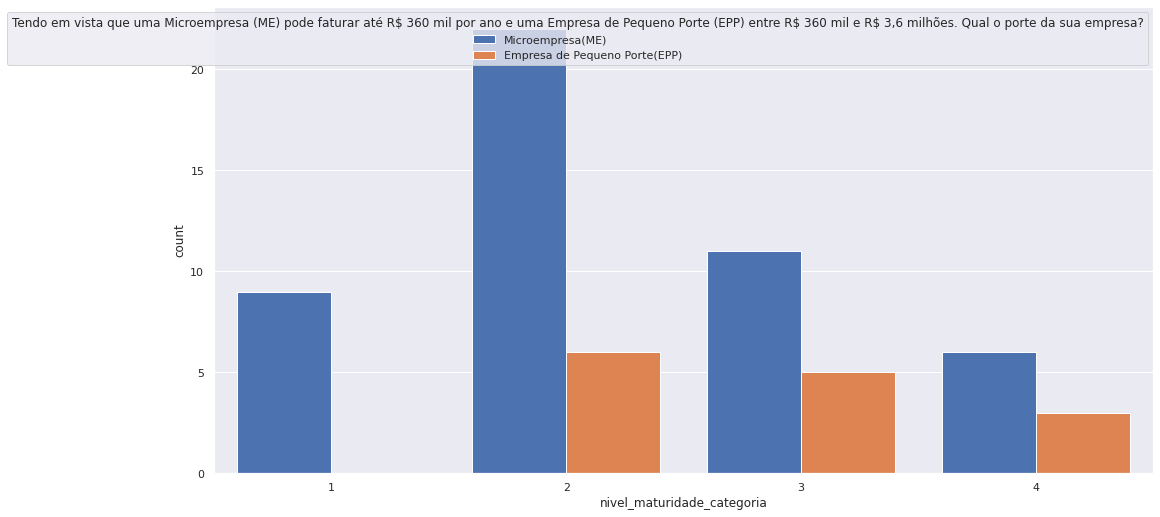

In [14]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.countplot(data = dados , x='nivel_maturidade_categoria',  hue='Tendo em vista que uma Microempresa (ME) pode faturar até R$ 360 mil por ano e uma Empresa de Pequeno Porte (EPP) entre R$ 360 mil e R$ 3,6 milhões. Qual o porte da sua empresa?', saturation=1)